# Projet de mise en œuvre d'un modèle de Machine Learning avec Scikit-learn  - Titanic Dataset

Ce notebook effectue une analyse complète du dataset Titanic pour prédire les chances de survie des passagers.
Les étapes incluent :
- Chargement des données
- Visualisation des données
- Traitement des valeurs manquantes
- Renommage des colonnes
- Prétraitement des données
- Entraînement d'un modèle de Machine Learning
- Évaluation du modèle


In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Chargement des données
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Aperçu des données
Examinons les premières lignes et les informations générales sur les données.

In [2]:
# Aperçu des données
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Traitement des valeurs manquantes
Nous allons analyser les colonnes avec des valeurs manquantes et les traiter en conséquence.

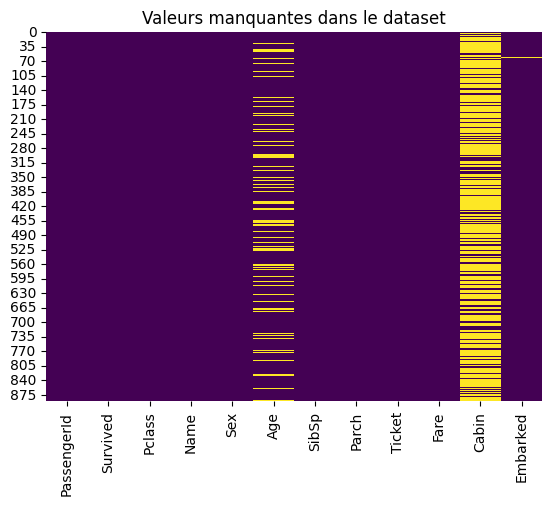

<ipython-input-3-26780763c8b9>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Remplissage des âges manquants par la médiane
<ipython-input-3-26780763c8b9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [3]:
# Visualisation des valeurs manquantes
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Valeurs manquantes dans le dataset')
plt.show()

# Traitement :
data['Age'].fillna(data['Age'].median(), inplace=True)  # Remplissage des âges manquants par la médiane
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Remplissage des ports d'embarquement par la mode
data.drop(columns=['Cabin'], inplace=True)  # Suppression de la colonne Cabin à cause de trop de valeurs manquantes


## Renommage des colonnes
Pour rendre les noms de colonnes plus cohérents.

In [4]:
# Renommage des colonnes
data.rename(columns={
    'PassengerId': 'ID',
    'Survived': 'Survie',
    'Pclass': 'Classe',
    'Name': 'Nom',
    'Sex': 'Sexe',
    'Age': 'Âge',
    'SibSp': 'Nb_Frères_Soeurs',
    'Parch': 'Nb_Parents_Enfants',
    'Ticket': 'Billet',
    'Fare': 'Tarif',
    'Embarked': 'Embarquement'
}, inplace=True)
data.head()

,ID,Survie,Classe,Nom,Sexe,Âge,Nb_Frères_Soeurs,Nb_Parents_Enfants,Billet,Tarif,Embarquement
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Prétraitement des données
Encodage des variables catégoriques et normalisation des données.

In [5]:
# Encodage des variables catégoriques
encoder = LabelEncoder()
data['Sexe'] = encoder.fit_transform(data['Sexe'])
data['Embarquement'] = encoder.fit_transform(data['Embarquement'])

# Normalisation des variables numériques
scaler = StandardScaler()
data[['Âge', 'Tarif']] = scaler.fit_transform(data[['Âge', 'Tarif']])

## Entraînement du modèle
Nous utilisons un modèle de classification basé sur Random Forest.

In [6]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Séparation des données
X = data.drop(columns=['Survie', 'Nom', 'Billet', 'ID'])
y = data['Survie']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)
# Initialisation des modèles
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Entraînement et prédiction
results = {}
reports = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    reports[name] = classification_report(y_test, y_pred, output_dict=True)
    report = reports[name]
    results[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['macro avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(results).transpose()
results_df



,Accuracy,Precision,Recall,F1-Score
RandomForest,0.815642,0.812187,0.815642,0.814563
DecisionTree,0.782123,0.775401,0.782123,0.782708
SVM,0.815642,0.813699,0.815642,0.814040
LogisticRegression,0.810056,0.805701,0.810056,0.809193


Text(0.5, 1.0, 'Comparaison des modèles')

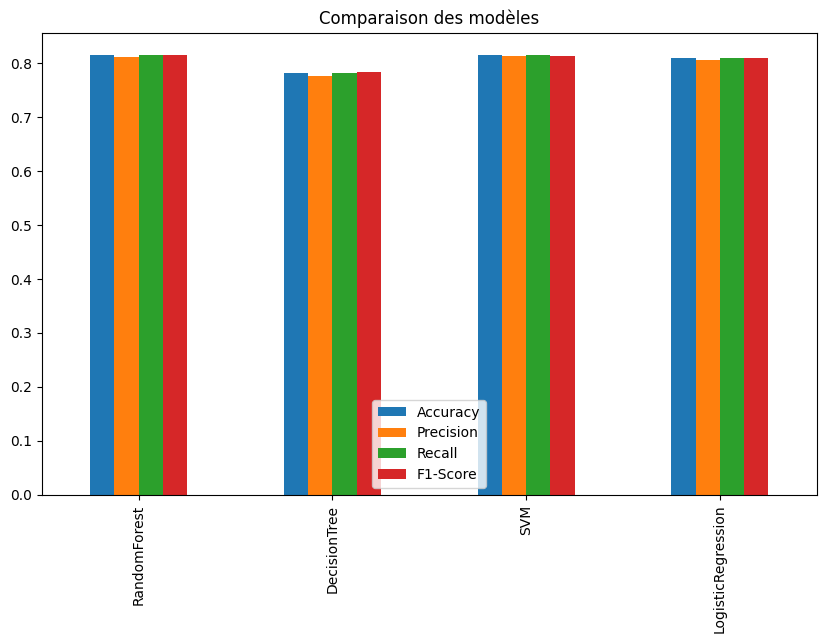

In [7]:
# matplot
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparaison des modèles')

## Évaluation du modèle
Nous utilisons un rapport de classification et une matrice de confusion pour évaluer les performances.

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



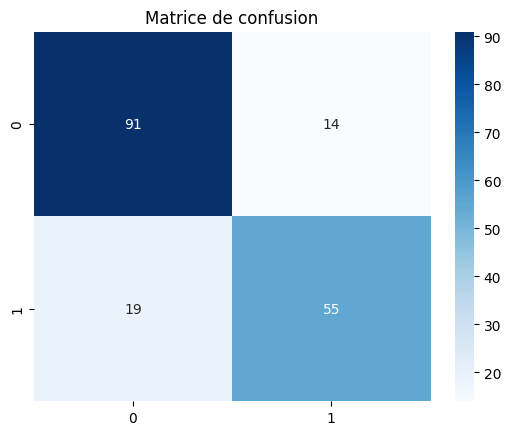

In [8]:
# Rapport de classification

model = models['RandomForest']
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

AUC Score for RandomForest: 0.90


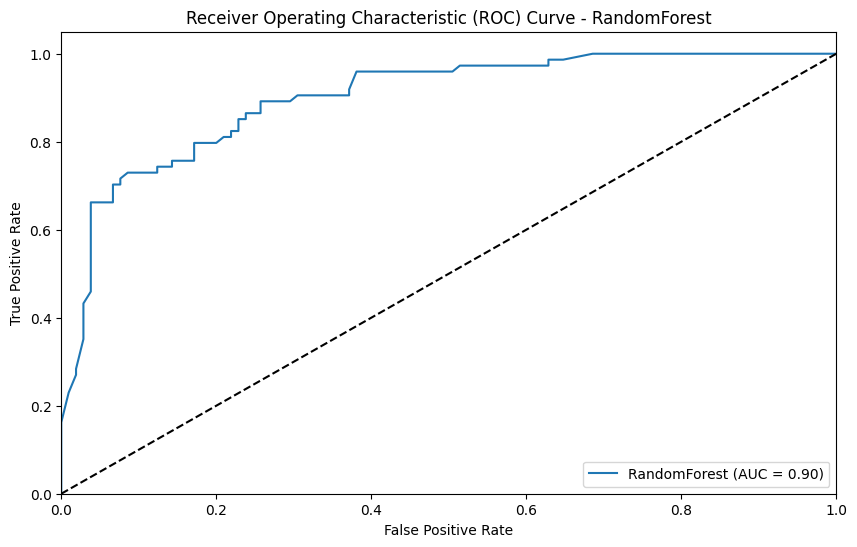

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calcul du score AUC pour le modèle RandomForest
y_pred_proba_rf = models['RandomForest'].predict_proba(X_test)[:, 1]
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Affichage du score AUC
print(f"AUC Score for RandomForest: {auc_score_rf:.2f}")

# Tracé de la courbe ROC pour le modèle RandomForest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC = {auc_score_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - RandomForest')
plt.legend(loc='lower right')
plt.show()


# Choix des hyperparamètres

## Sélection des hyperparamètres pour RandomForest

Nous allons effectuer une recherche en grille (Grid Search) pour trouver les meilleurs hyperparamètres pour le modèle RandomForest. Cela nous permettra d'optimiser les performances du modèle en testant différentes combinaisons de paramètres.

In [10]:
from sklearn.model_selection import GridSearchCV

# Définition des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],

}

# Initialisation du modèle RandomForest
rf = RandomForestClassifier(random_state=42)

# Initialisation de GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entraînement de GridSearchCV
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Utilisation du meilleur modèle pour prédire
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred_best_rf))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Meilleurs hyperparamètres :  {'criterion': 'entropy', 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



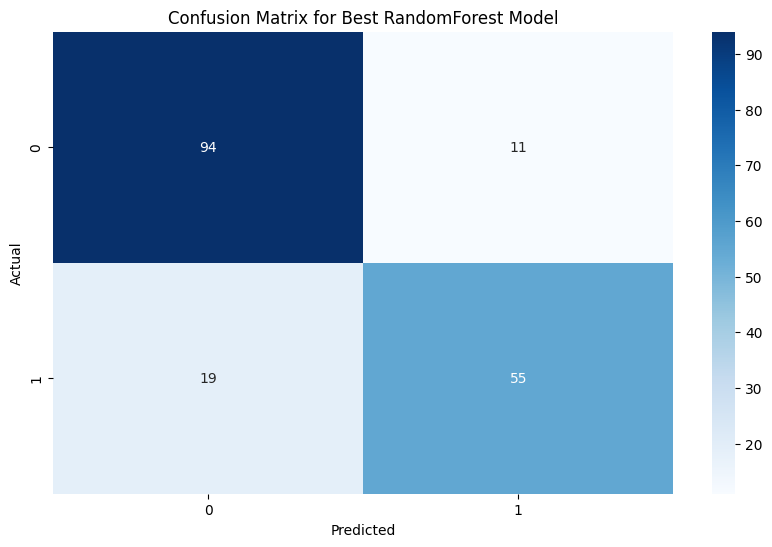

In [11]:
cm = confusion_matrix(y_test, y_pred_best_rf)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best RandomForest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()